### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('drugLibTest_raw.tsv', sep='\t', header=0, index_col=0);
df.head()


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [6]:
df.tail()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...
729,claripel-cream,8,Considerably Effective,Mild Side Effects,acne scarring & hyperpigmentation,"Up until 2 years ago, it worked really well on...",Have stopped using it and have also learned th...,Stopped using it for the time being.


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036 entries, 1366 to 729
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        1036 non-null   object
 1   rating             1036 non-null   int64 
 2   effectiveness      1036 non-null   object
 3   sideEffects        1036 non-null   object
 4   condition          1036 non-null   object
 5   benefitsReview     1031 non-null   object
 6   sideEffectsReview  1013 non-null   object
 7   commentsReview     1035 non-null   object
dtypes: int64(1), object(7)
memory usage: 72.8+ KB


In [5]:
df.nunique()

urlDrugName           314
rating                 10
effectiveness           5
sideEffects             5
condition             566
benefitsReview       1022
sideEffectsReview     967
commentsReview       1029
dtype: int64

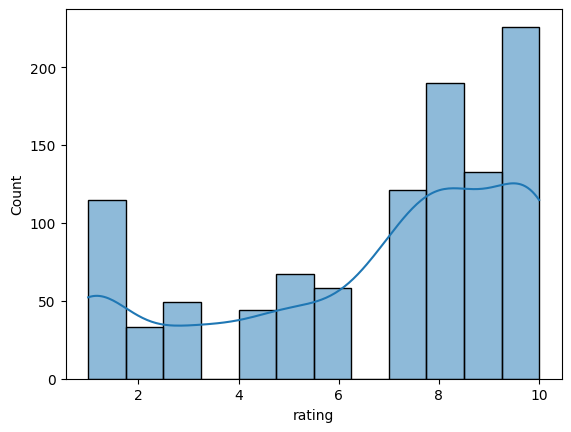

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["rating"], kde= True);

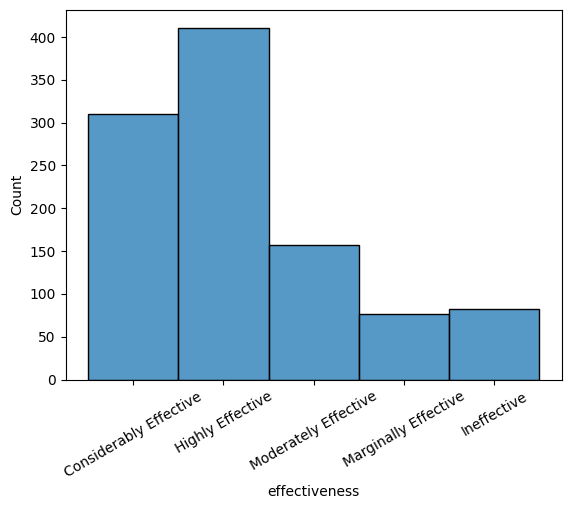

In [13]:
plt.xticks(rotation=30);
sns.histplot(df["effectiveness"]);

In [17]:
df.groupby('effectiveness').mean('rating').sort_values(by='rating', ascending=False)

,rating
effectiveness,
Highly Effective,8.698297
Considerably Effective,7.222581
Moderately Effective,5.273885
Marginally Effective,3.026316
Ineffective,1.695122


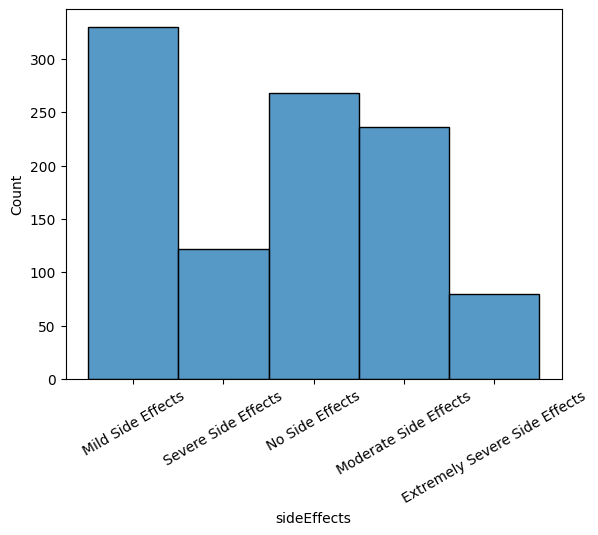

In [18]:
plt.xticks(rotation=30);
sns.histplot(df["sideEffects"]);

In [19]:
df.groupby('sideEffects').mean('rating').sort_values(by='rating', ascending=False)

,rating
sideEffects,
No Side Effects,8.746269
Mild Side Effects,8.054545
Moderate Side Effects,6.063559
Severe Side Effects,3.590164
Extremely Severe Side Effects,1.750000


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [23]:
effectiveness_dummies = pd.get_dummies(df['effectiveness'])
df = pd.concat([df.drop('effectiveness', axis=1), effectiveness_dummies], axis=1)

In [24]:
sideEffects_dummies = pd.get_dummies(df['sideEffects'])
df = pd.concat([df.drop('sideEffects', axis=1), sideEffects_dummies], axis=1)

In [25]:
df.head()

,urlDrugName,rating,condition,benefitsReview,sideEffectsReview,commentsReview,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
1366,biaxin,9,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,True,False,False,False,False,False,True,False,False,False
3724,lamictal,9,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,False,True,False,False,False,False,True,False,False,False
3824,depakene,4,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,False,False,False,False,True,False,False,False,False,True
969,sarafem,10,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,False,True,False,False,False,False,False,False,True,False
696,accutane,10,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,False,True,False,False,False,False,True,False,False,False


In [26]:
df.columns.values

array(['urlDrugName', 'rating', 'condition', 'benefitsReview',
       'sideEffectsReview', 'commentsReview', 'Considerably Effective',
       'Highly Effective', 'Ineffective', 'Marginally Effective',
       'Moderately Effective', 'Extremely Severe Side Effects',
       'Mild Side Effects', 'Moderate Side Effects', 'No Side Effects',
       'Severe Side Effects'], dtype=object)

In [27]:
df.nunique()

urlDrugName                       314
rating                             10
condition                         566
benefitsReview                   1022
sideEffectsReview                 967
commentsReview                   1029
Considerably Effective              2
Highly Effective                    2
Ineffective                         2
Marginally Effective                2
Moderately Effective                2
Extremely Severe Side Effects       2
Mild Side Effects                   2
Moderate Side Effects               2
No Side Effects                     2
Severe Side Effects                 2
dtype: int64

In [29]:
X = df[['rating', 'Considerably Effective',
       'Highly Effective', 'Ineffective', 'Marginally Effective',
       'Moderately Effective', 'Extremely Severe Side Effects',
       'Mild Side Effects', 'Moderate Side Effects', 'No Side Effects',
       'Severe Side Effects']]

In [30]:
X.shape

(1036, 11)

In [45]:
len(df['urlDrugName'])

1036

In [46]:
df.head()

,urlDrugName,rating,condition,benefitsReview,sideEffectsReview,commentsReview,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
1366,biaxin,9,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,True,False,False,False,False,False,True,False,False,False
3724,lamictal,9,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,False,True,False,False,False,False,True,False,False,False
3824,depakene,4,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,False,False,False,False,True,False,False,False,False,True
969,sarafem,10,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,False,True,False,False,False,False,False,False,True,False
696,accutane,10,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,False,True,False,False,False,False,True,False,False,False


In [48]:
df.condition.value_counts().sum()

np.int64(1036)

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [ ]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, n_init=150, random_state=10).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
df_kmeans['inertia_1'] = df_kmeans['inertia'].shift(1)
df_kmeans['diff%'] = df_kmeans['inertia']/df_kmeans['inertia_1']
df_kmeans

,inertia,inertia_1,diff%
0,10702.518340,NaN,NaN
1,3400.592657,10702.518340,0.317738
2,2209.363130,3400.592657,0.649699
3,1639.460433,2209.363130,0.742051
4,1418.790033,1639.460433,0.865401
5,1281.874980,1418.790033,0.903499
6,1164.855429,1281.874980,0.908712
7,1080.162910,1164.855429,0.927294
8,1014.805852,1080.162910,0.939493


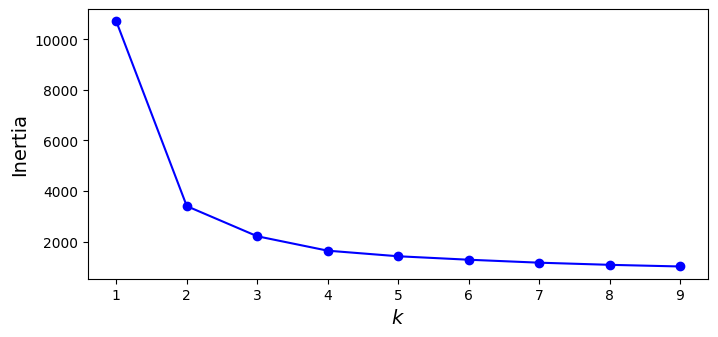

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(4, inertias[3]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
# plt.axis([1, 8.5, 0, 1300])
plt.show();

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

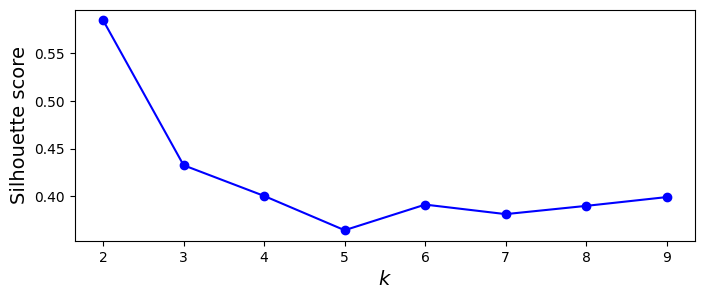

In [94]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

#### Genera el K Means 

In [ ]:
kmeans2 = KMeans(n_clusters=2, n_init=150, random_state=10)

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [84]:
kmeans2.labels_

array([0, 0, 1, ..., 0, 0, 0], shape=(1036,), dtype=int32)

In [87]:
unique, frequency = np.unique(kmeans2.labels_, 
                              return_counts = True)

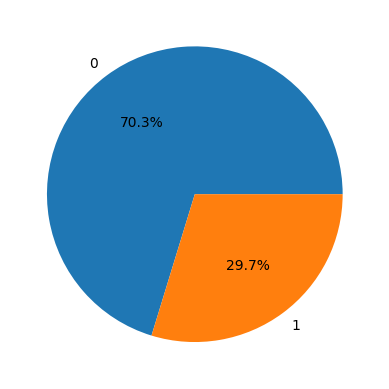

In [89]:
plt.pie(frequency, labels=unique, autopct='%1.1f%%')
plt.show()